In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support,classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
class_names = ['suspicious', 'non-suspicious']

#These are the functions I will use for result visualisation
def plot_confusion_matrix(y_test,y_predicted,labels):
    cm = confusion_matrix(y_test, y_predicted.round())

    figsize = (10,7)
    df_cm = pd.DataFrame(
        cm, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

def evaluate_classifier(pipeline, x_test, y_test):

    y_predicted = pipeline.predict(x_test)

    report = classification_report(y_test, np.round(y_predicted))
    print(report)
    plot_confusion_matrix(y_test, y_predicted, class_names)
    return

In [3]:
train_data = pd.read_csv('data/train.csv', index_col='customer')
test_data = pd.read_csv('data/test.csv', index_col='customer')

In [4]:
train_dummies = pd.get_dummies(train_data, columns=['category', 'is_pep', 'nationality'])
test_dummies = pd.get_dummies(test_data, columns=['category', 'is_pep', 'nationality'])

In [5]:
x_train = train_dummies.drop(['suspicious'], axis=1)
y_train = pd.DataFrame(train_dummies['suspicious'])
x_test = test_dummies.copy()
x_test['nationality_117'] = 0

In [6]:
x_train.head()

,turnover,transaction_count,io_ratio,age,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,...,nationality_66,nationality_94,nationality_113,nationality_117,nationality_123,nationality_134,nationality_141,nationality_172,nationality_176,nationality_191
customer,,,,,,,,,,,,,,,,,,,,,
90000000,734958.58,7.0,0.142857,79.0,24.63,124.0,3,6.0,0.128703,215959.85,...,0,0,0,0,0,1,0,0,0,0
90000001,1009400.35,2.0,0.500000,0.0,78.49,79.0,3,1.0,0.635584,53.97,...,0,0,0,0,0,0,0,0,0,0
90000002,11051.68,3.0,0.666667,77.0,35.74,72.0,2,1.0,0.138152,1632.91,...,0,0,0,0,0,0,0,0,0,1
90000003,31193.29,81.0,0.308642,77.0,2.05,95.0,2,2.0,0.333904,3203.10,...,0,0,0,0,0,0,0,0,0,0
90000004,205489.77,1.0,1.000000,39.0,147.53,148.0,4,1.0,0.341578,5626.65,...,0,0,0,0,0,0,0,1,0,0


In [7]:
pipeline = Pipeline([
    ('normalizer', Normalizer()), 
    ('random_forest', RandomForestClassifier(n_estimators=1000, criterion='entropy',  max_depth=10, random_state=0, n_jobs=-1, 
                                            class_weight='balanced'))
])

In [ ]:
pipeline.fit(x_train, y_train)

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
evaluate_classifier(pipeline, x_train, y_train)

In [ ]:
train_dummies_suspicious = train_dummies[train_dummies['suspicious'] == 1]
x_train_suspicious = train_dummies_suspicious.drop(['suspicious'], axis=1)
y_train_suspicious = pd.DataFrame(train_dummies_suspicious['suspicious'])

train_dummies_non_suspicious = train_dummies[train_dummies['suspicious'] == 0]
x_train_non_suspicious = train_dummies_non_suspicious.drop(['suspicious'], axis=1)
y_train_non_suspicious = pd.DataFrame(train_dummies_non_suspicious['suspicious'])

In [ ]:
np.random.choice(x_train_non_suspicious.shape[0], x_train_suspicious.shape[0])
x_train_non_suspicious[indexes_selected_non_suspicious]

In [13]:
for i in range(10):
    indexes_selected_non_suspicious = np.random.choice(x_train_non_suspicious.shape[0], x_train_suspicious.shape[0])
    x_selected_non_suspicious = x_train_non_suspicious.values[indexes_selected_non_suspicious]
    y_selected_non_suspicious = y_train_non_suspicious.values[indexes_selected_non_suspicious]
    x_total = np.vstack((x_selected_non_suspicious, x_train_suspicious))
    y_total = np.vstack((y_selected_non_suspicious, y_train_suspicious))
    evaluate_classifier(pipeline, x_total, y_total)

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174



C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174



C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174



C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174



C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9087
           1       0.00      0.00      0.00      9087

   micro avg       0.50      0.50      0.50     18174
   macro avg       0.25      0.50      0.33     18174
weighted avg       0.25      0.50      0.33     18174

              preci

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


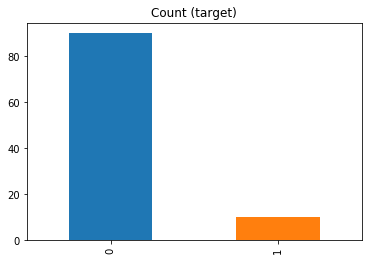

In [91]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83    896530
           1       0.02      0.74      0.04      8214

   micro avg       0.71      0.71      0.71    904744
   macro avg       0.51      0.72      0.44    904744
weighted avg       0.99      0.71      0.82    904744



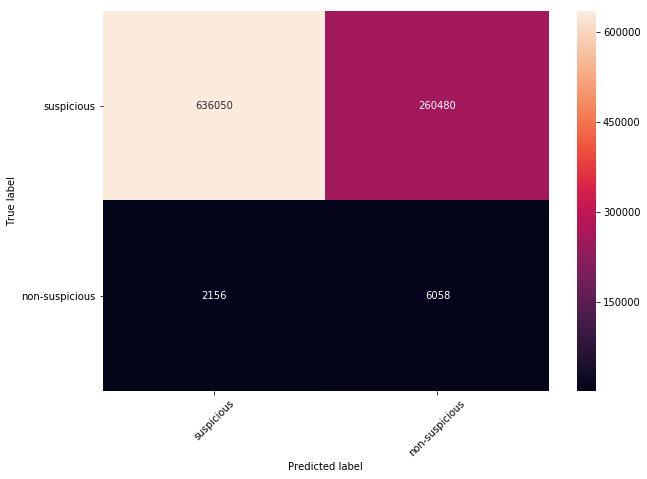

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      0.73      0.85    896574
           1       0.02      0.71      0.05      8233

   micro avg       0.73      0.73      0.73    904807
   macro avg       0.51      0.72      0.45    904807
weighted avg       0.99      0.73      0.84    904807



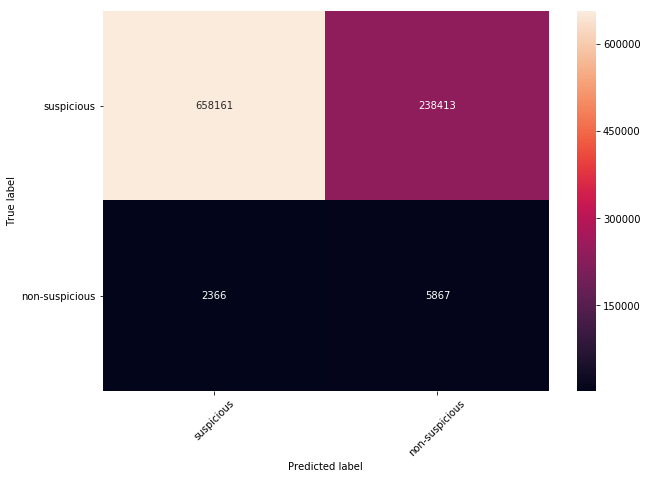

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      0.74      0.85    896643
           1       0.02      0.72      0.05      8219

   micro avg       0.74      0.74      0.74    904862
   macro avg       0.51      0.73      0.45    904862
weighted avg       0.99      0.74      0.84    904862



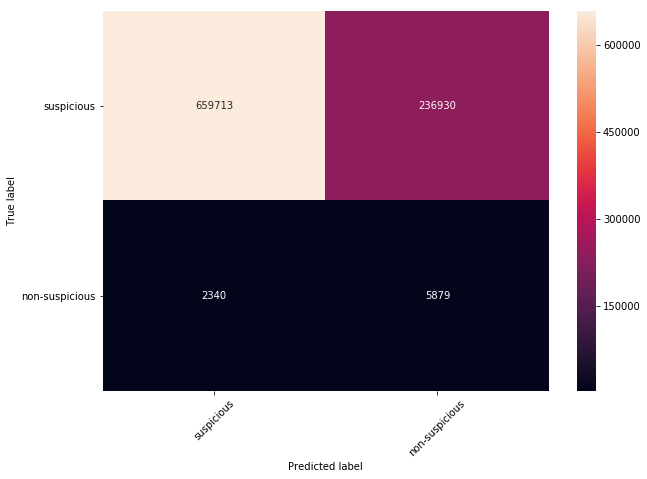

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      0.73      0.84    896503
           1       0.02      0.71      0.05      8210

   micro avg       0.73      0.73      0.73    904713
   macro avg       0.51      0.72      0.44    904713
weighted avg       0.99      0.73      0.83    904713



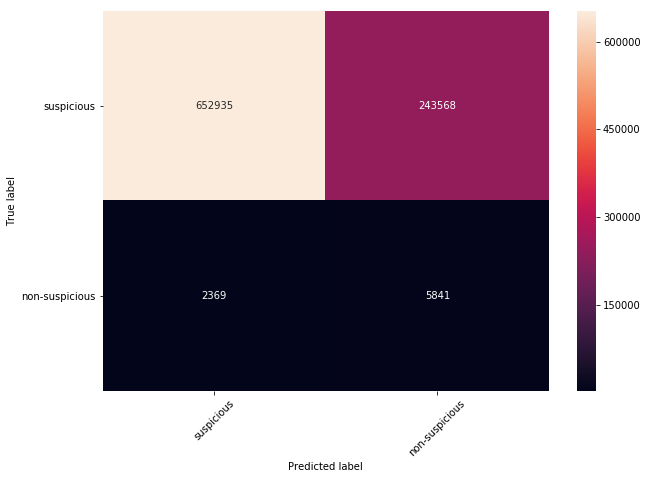

C:\Users\Marku\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      0.75      0.85    896695
           1       0.02      0.69      0.05      8198

   micro avg       0.75      0.75      0.75    904893
   macro avg       0.51      0.72      0.45    904893
weighted avg       0.99      0.75      0.85    904893



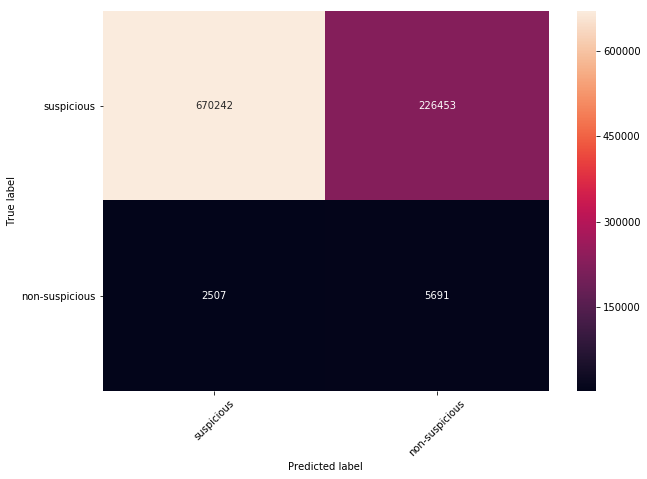

In [124]:
for i in range(5):
    indices = np.random.choice(x_train.shape[0], int(x_train.shape[0]*0.1))
    ids = x_train.index[indices]

    x_train_train = x_train.values[indices]
    x_train_validation = x_train.drop(ids)
    y_train_train = y_train.values[indices]
    y_train_validation = y_train.drop(ids)

    rus = RandomUnderSampler(return_indices=True)
    X_rus, y_rus, id_rus = rus.fit_sample(x_train_train, y_train_train)

    pipeline.fit(X_rus, y_rus)
    accs.append(evaluate_classifier(pipeline, x_train_validation, y_train_validation))


In [132]:
predicted_labels = pipeline.predict_proba(x_test)

data_set_with_label = x_test.copy(deep=True)

data_set_with_label['label'] = predicted_labels[:,1]

data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)

aaa = data_set_with_label.head(1000)

aaa.index.to_frame().to_csv("res.csv",index=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import math
from tqdm import tnrange, tqdm_notebook

In [ ]:
# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
batch_size, D_in, H, D_out = 64, x_train.shape[0], 1000, 1
#la première ligne qui contient le numéro de frame ne nous intéresse pas dans le NN

#Define the model sequentially
m = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(), 
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

lambda_ = 1e-4
epochs = 5000
loss = torch.nn.BCELoss()
batch_size = 64

In [ ]:
def train_NNmodel_batch(model, xs, ys, learning_rate, loss_fn, number_of_epochs, batch_size):
    #to run on GPU
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in tqdm_notebook(range(number_of_epochs), name='Epoch'):
        
        #get number of random indexes equal to batch_size
        indexes_batch = np.random.choice(xs.shape[0], batch_size, replace=False)
        #get the rows that correspond to these 
        x_selected = xs[indexes_batch]

        #give directly the matrix as input to the model
        x = torch.tensor(x_selected, dtype = torch.float, device=device)         
        
        y_temp = ys[indexes_batch]
        y = torch.tensor([y_temp], dtype=torch.float, device = device)
        y = y.transpose_(0, 1)
        
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        #print('Epoch: ', epoch, ' Column: ', i, ' Loss: ', loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
train_NNmodel_batch(m, x_train, y_train, lambda_, loss, epochs, batch_size)